# Handwritten Digits Recognition using Tensorflow

- Hey everyone, this is my first complete machine learning project where I have worked on solving the problem on recognising `Handwritten Digits`.

- Like many of you this is my first step to understanding this branch of computer science and hopefully mastering it soon.

- Through this project I have taken the `first step towards my school dream` of building machine learning models.

- I am open to constructive criticism and suggestions in developing my model even further if any 🙂.

## Necessary Imports

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Importing the training dataset with handwritten digits

In [2]:
digits = pd.read_csv("../input/digit-recognizer/train.csv")

## Exploring the dataset

In [3]:
digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


## Seperating the Pixel Data from the Labels

In [4]:
labels = digits["label"]
labels.head()

digits = digits.drop("label", axis = 1)
digits.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Splitting the training and validation data

In [5]:
X_train, y_train = digits.iloc[:38000], labels.iloc[:38000]
X_valid, y_valid = digits.iloc[38000:40000], labels.iloc[38000:40000]
X_test, y_test = digits.iloc[40000:], labels[40000:]
'''from sklearn.model_selection import train_test_split

# Splitting the Training and Testing Sets
X_train_full, X_test, y_train_full, y_test = train_test_split(digits, labels, test_size=0.1, random_state=17)

# Splitting the Training and Validation Sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.1, random_state=17)'''

'from sklearn.model_selection import train_test_split\n\n# Splitting the Training and Testing Sets\nX_train_full, X_test, y_train_full, y_test = train_test_split(digits, labels, test_size=0.1, random_state=17)\n\n# Splitting the Training and Validation Sets\nX_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.1, random_state=17)'

In [6]:
# Converting the DataFrame to Numpy Arrays
X_train = X_train.to_numpy()
X_valid = X_valid.to_numpy()
X_test = X_test.to_numpy()

print("Training Set: ", X_train.shape)
print("Validation Set: ", X_valid.shape)
print("Test Set: ", X_test.shape)

Training Set:  (38000, 784)
Validation Set:  (2000, 784)
Test Set:  (2000, 784)


In [7]:
# Reshaping the numpy arrays
X_train = X_train.reshape(X_train.shape[0], 28, 28)
X_valid = X_valid.reshape(X_valid.shape[0], 28, 28)
X_test = X_test.reshape(X_test.shape[0], 28, 28)

## Viewing the Digits

4


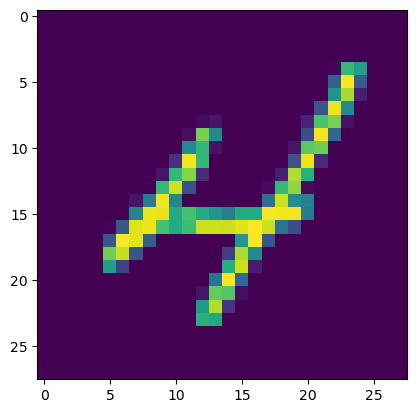

In [8]:
# Index Value to Visualise using Matplotlib
index = 700

print(y_train[index])
plt.imshow(X_train[index])

## Normalising the Pixel Values

In [9]:
X_train = X_train / 255.0
X_valid = X_valid / 255.0

## Designing the Model

In [10]:
model = tf.keras.Sequential([
    
    # Convolutional Layer
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
    
    # Flatten Layer
    tf.keras.layers.Flatten(),
    
    # Hidden Layer
    tf.keras.layers.Dense(units=256, activation="relu", kernel_regularizer=tf.keras.regularizers.L2(0.01)),
    tf.keras.layers.Dense(units=256, activation="relu", kernel_regularizer=tf.keras.regularizers.L2(0.01)),
    tf.keras.layers.Dense(units=256, activation="relu", kernel_regularizer=tf.keras.regularizers.L2(0.01)),
    
    # Output Layer
    tf.keras.layers.Dense(units=10, activation="linear")
])

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), 
              metrics = ["accuracy"])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 1152)              0

## Training the model

In [12]:
history = model.fit(X_train, y_train, epochs=25, validation_data=(X_valid, y_valid))

Epoch 1/25
1188/1188 [==============================] - 15s 5ms/step - loss: 0.8857 - accuracy: 0.9237 - val_loss: 0.2531 - val_accuracy: 0.9605
Epoch 2/25
1188/1188 [==============================] - 6s 5ms/step - loss: 0.2140 - accuracy: 0.9686 - val_loss: 0.1642 - val_accuracy: 0.9770
Epoch 3/25
1188/1188 [==============================] - 6s 5ms/step - loss: 0.1632 - accuracy: 0.9769 - val_loss: 0.1246 - val_accuracy: 0.9825
Epoch 4/25
1188/1188 [==============================] - 6s 5ms/step - loss: 0.1379 - accuracy: 0.9806 - val_loss: 0.1338 - val_accuracy: 0.9785
Epoch 5/25
1188/1188 [==============================] - 6s 5ms/step - loss: 0.1237 - accuracy: 0.9823 - val_loss: 0.1153 - val_accuracy: 0.9795
Epoch 6/25
1188/1188 [==============================] - 6s 5ms/step - loss: 0.1063 - accuracy: 0.9846 - val_loss: 0.1023 - val_accuracy: 0.9835
Epoch 7/25
1188/1188 [==============================] - 6s 5ms/step - loss: 0.1042 - accuracy: 0.9847 - val_loss: 0.0982 - val_accuracy

## Checking the preformance of the model on the Training Set and Validation Set

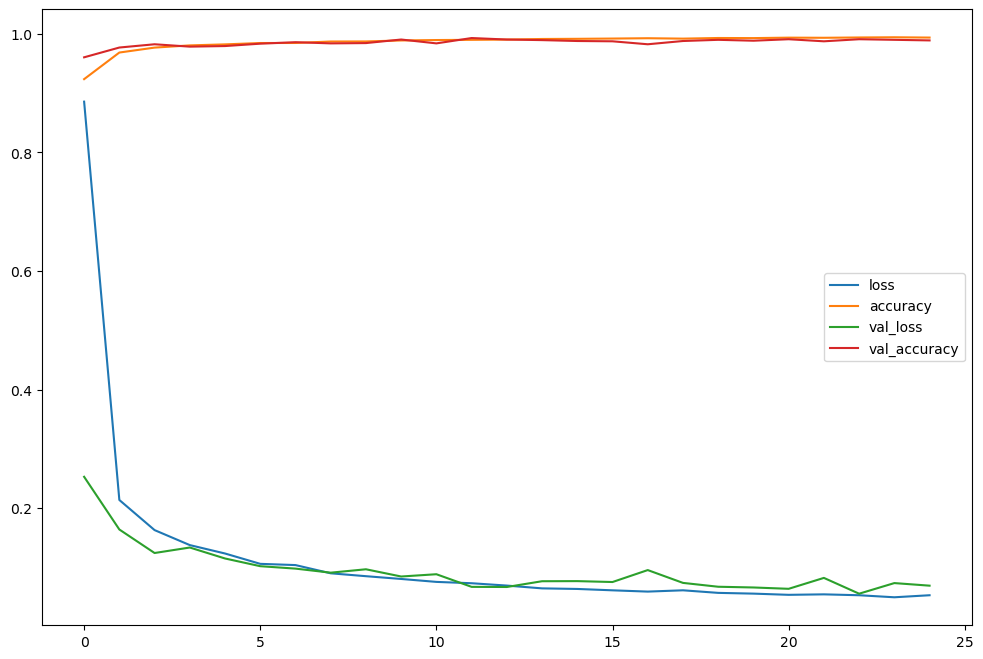

In [13]:
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.show()

## Checking Performance on the Seperated Test Set

In [14]:
X_test = X_test / 255.0
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 3ms/step - loss: 0.0939 - accuracy: 0.9875


[0.09388371556997299, 0.987500011920929]

## Importing the Testing CSV and Making the Predictions

In [15]:
test_digit = pd.read_csv("../input/digit-recognizer/test.csv")
test_digit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [16]:
# Converting the Test Set to Numpy Array
test_set = test_digit.to_numpy()
test_set = test_set.reshape(28000, 28, 28)
print("Test Set Shape: ", test_set.shape)

Test Set Shape:  (28000, 28, 28)


In [17]:
# Making the Predictions
prediction = model.predict(test_set)

875/875 [==============================] - 2s 2ms/step


## Creating a list of the predictions

In [18]:
class_predictions = list(map(np.argmax, prediction))
for i in range(5):
    print(class_predictions[i])

2
0
9
9
3


## Testing the predictions

Label Predicted:  6


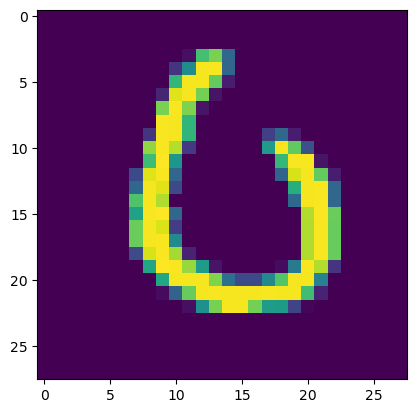

In [19]:
# Checking the test set predictions
index = 1900

print(f"Label Predicted: ", class_predictions[index])
plt.imshow(test_set[index])

## Creating a csv of the predictions

In [20]:
class_predictions = list(zip([i for i in range(1, 28001)], class_predictions))
for i in range(5):
    print(class_predictions[i])

(1, 2)
(2, 0)
(3, 9)
(4, 9)
(5, 3)


In [21]:
pred_df = pd.DataFrame(class_predictions, columns = ["ImageId", "Label"])
pred_df.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


## Converting the data to a CSV

In [22]:
pred_df.to_csv("PREDICTION.csv", index = False)